In [3]:
# Import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default asthetic parameters.
sns.set()

# Define data path
data_path = "../data/"

In [4]:
# Load orders dataset.
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [5]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")
# Print English names.
products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

In [6]:
# Define product category name in orders DataFrame.
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [7]:
# Drop products without a defined category.
orders.dropna(inplace=True, subset=['product_category_name_english'])
# Print number of unique items.
len(orders['product_id'].unique())

32328

In [8]:
# Print number of unique categories.
len(orders['product_category_name_english'].unique())

71

In [9]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby("order_id").product_category_name_english.unique()

# Print transactions header.
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75            [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

In [10]:
# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

# Print example.
example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

<Axes: xlabel='product_category_name_english'>

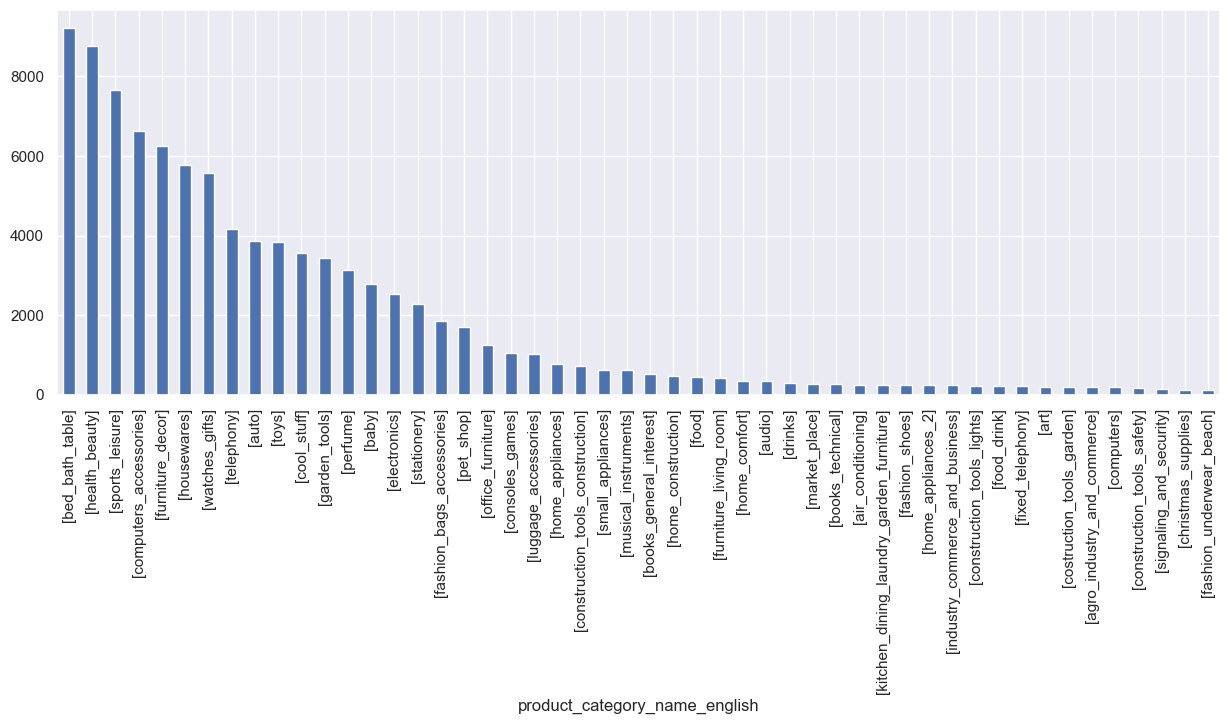

In [11]:
# Plot 50 largest categories of transactions.
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [12]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()

In [13]:
# Print length of transactions.
len(transactions)

97256

In [14]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]

In [15]:
# Print median number of items in a transaction.
np.median(counts)

np.float64(1.0)

In [16]:
# Print maximum number of items in a transaction.
np.max(counts)

np.int64(3)

In [17]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [18]:
# Print header.
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_crafts               0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

In [20]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
Name: count, dtype: int64

In [21]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

np.float64(0.00014394998766142962)

In [22]:
# Merge books_imported and books_technical.
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

# Print support values for books, books_imported, and books_technical.
onehot[['books','books_imported','books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

In [23]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['sports_leisure'].mean()

np.float64(0.0018134715025906734)

In [24]:
# Print confidence for health_beauty -> sports_leisure.
joint_support / onehot['sports_leisure'].mean()

np.float64(0.0018134715025906734)

In [25]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.040070,(5)
1,0.029664,(6)
2,0.096827,(7)
3,0.068777,(15)
4,0.010920,(16)
5,0.037345,(20)
6,0.026219,(27)
7,0.019166,(28)
8,0.066310,(40)
9,0.036173,(43)


In [26]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.003599,(audio)
4,0.040070,(auto)
5,0.029664,(baby)
6,0.096827,(bed_bath_table)
7,0.005264,(books_general_interest)
8,0.002673,(books_technical)
9,0.001316,(christmas_supplies)


In [27]:
# Apply apriori algorithm to data with min support threshold of 0.00005.
frequent_itemsets = apriori(onehot, min_support = 0.00005, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_crafts)
4,0.003599,(audio)
...,...,...
108,0.000051,"(stationery, luggage_accessories)"
109,0.000051,"(watches_gifts, sports_leisure)"
110,0.000144,"(sports_leisure_health_beauty, sports_leisure)"
111,0.000062,"(stationery, toys)"


In [28]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(baby),(bed_bath_table),0.029664,0.096827,0.000175,0.005893,0.060856,1.0,-0.002697,0.908527,-0.940842,0.001384,-0.100683,0.003849
1,(bed_bath_table),(baby),0.096827,0.029664,0.000175,0.001805,0.060856,1.0,-0.002697,0.972091,-0.944710,0.001384,-0.028710,0.003849
2,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185633,1.0,-0.000902,0.975709,-0.820052,0.003078,-0.024896,0.006220
3,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185633,1.0,-0.000902,0.969375,-0.818876,0.003078,-0.031592,0.006220
4,(furniture_decor),(baby),0.066310,0.029664,0.000123,0.001861,0.062728,1.0,-0.001844,0.972145,-0.941187,0.001287,-0.028653,0.003010


In [29]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,1.0,-0.000086,0.957388,-0.627199,0.000752,-0.044508,0.012764
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,1.0,-0.000146,0.958606,-0.704299,0.001005,-0.043181,0.009105
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,1.0,-0.005701,0.913084,-0.894549,0.004432,-0.095189,0.009144
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,1.0,0.000047,1.012881,0.106474,0.004401,0.012717,0.056439
4,(books),(books_imported),0.003218,0.000545,0.000545,0.169329,310.722045,1.0,0.000543,1.203190,1.000000,0.169329,0.168876,0.584665
5,(books_imported),(books),0.000545,0.003218,0.000545,1.000000,310.722045,1.0,0.000543,inf,0.997325,0.169329,1.000000,0.584665
6,(books),(books_technical),0.003218,0.002673,0.002673,0.830671,310.722045,1.0,0.002665,5.889872,1.000000,0.830671,0.830217,0.915335
7,(books_technical),(books),0.002673,0.003218,0.002673,1.000000,310.722045,1.0,0.002665,inf,0.999454,0.830671,1.000000,0.915335
8,(construction_tools_lights),(furniture_decor),0.002509,0.066310,0.000113,0.045082,0.679872,1.0,-0.000053,0.977770,-0.320675,0.001646,-0.022735,0.023394
9,(furniture_living_room),(furniture_decor),0.004339,0.066310,0.000072,0.016588,0.250155,1.0,-0.000216,0.949439,-0.750660,0.001020,-0.053253,0.008837


In [30]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,1.0,-0.005701,0.913084,-0.894549,0.004432,-0.095189,0.009144
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,1.0,0.000047,1.012881,0.106474,0.004401,0.012717,0.056439


In [31]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,1.0,0.000047,1.012881,0.106474,0.004401,0.012717,0.056439


<Axes: xlabel='leverage', ylabel='confidence'>

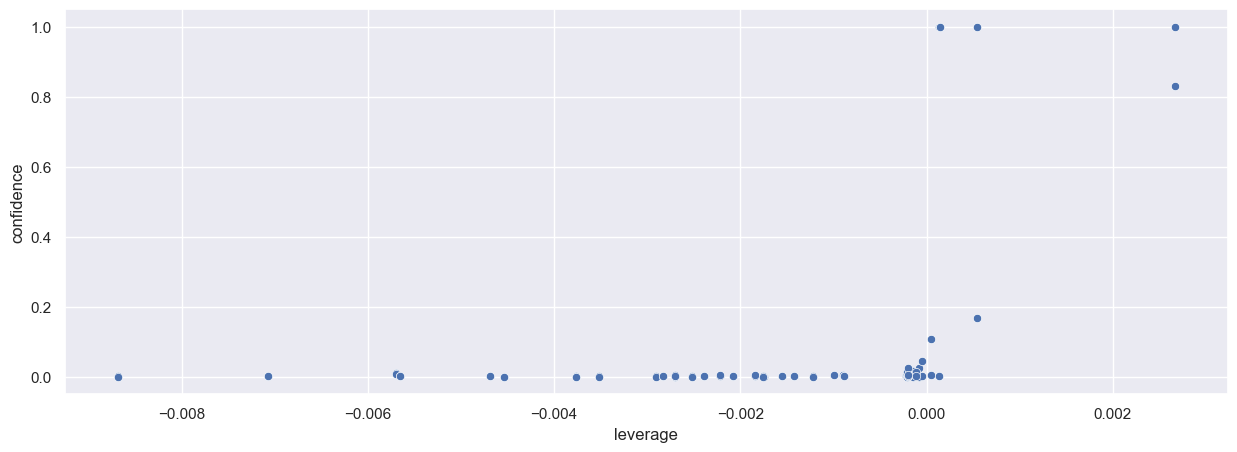

In [32]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)